### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 6


### Дисциплина: Методы машинного обучения

##### Студент:  Пономарева Л. М.
##### Группа:   НПИбд-02-19

## Москва 2022
***

Вариант 10 

1. Набор данных rock_paper_scissors 

2. Классы с метками 2,1,3 

3. Количество эпох 20

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

#### Задание 1
Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую и тестовую выборки.

In [2]:
ds = tfds.load("rock_paper_scissors", split=['train','test'])
df_train = tfds.as_dataframe(ds[0])
df_test  = tfds.as_dataframe(ds[1])
df_train.shape, df_test.shape

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteEEMTFB/rock_paper_scissors-train.tfrecord


  0%|          | 0/2520 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteEEMTFB/rock_paper_scissors-test.tfrecord


  0%|          | 0/372 [00:00<?, ? examples/s]

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


((2520, 2), (372, 2))

#### Задание 2
Визуализируйте несколько изображений, отобранных случайным образом из обучающей выборки.

In [3]:
from PIL import Image, ImageOps

Изображения являются цветными:

In [4]:
df_train.iloc[0]['image'].shape

(300, 300, 3)

Поместим изображения и их метки в массивы:

In [5]:
train_labels = df_train['label'].to_numpy(dtype=np.float32)
test_labels = df_test['label'].to_numpy(dtype=np.float32)
train_labels.shape, test_labels.shape

((2520,), (372,))

In [6]:
train_images = np.zeros(shape=(df_train.shape[0],300,300,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],300,300,3), dtype=np.float32)
train_images.shape, test_images.shape

((2520, 300, 300, 3), (372, 300, 300, 3))

In [7]:
for idx in range(train_labels.shape[0]):
    train_images[idx,:,:,:] = np.array(Image.fromarray(df_train.iloc[idx]['image']))

for idx in range(test_labels.shape[0]):
    test_images[idx,:,:,:] = np.array(Image.fromarray(df_test.iloc[idx]['image']))

train_images.shape, test_images.shape

((2520, 300, 300, 3), (372, 300, 300, 3))

Предварительная обработка изображений:

In [8]:
train_images /= 255
test_images  /= 255

In [9]:
train_images = tf.image.resize(train_images, [150, 150])
test_images = tf.image.resize(test_images, [150, 150])

Создадим функцию отрисовывающую изображения:

In [10]:
import random

def plot_random_sample(images, n):
    imgs = random.sample(list(images), n)
    
    num_col = 4
    num_row = n//num_col
    if n%num_col!=0:
      num_row+=1

    fig, axes = plt.subplots(num_row, num_col, figsize=(3.5 * num_col, 3 * num_row))
    for i in range(n):
        img = imgs[i] 
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)

    plt.tight_layout()
    plt.show()

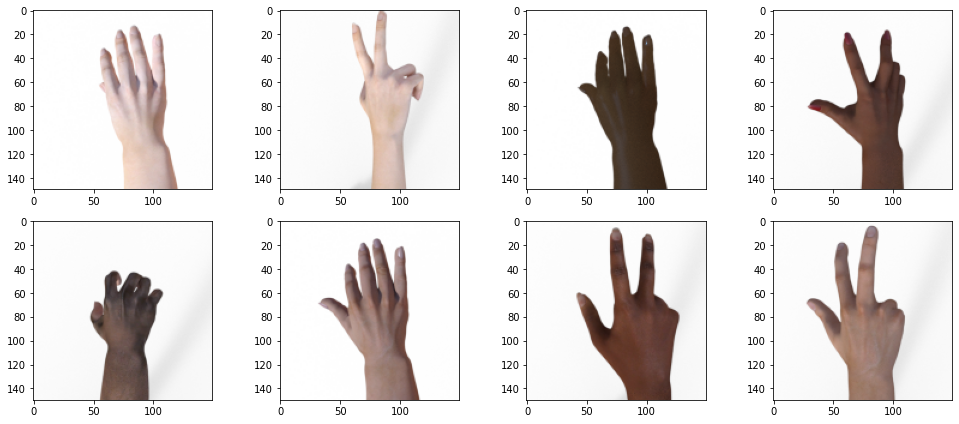

In [11]:
plot_random_sample(train_images, 8)

#### Задание 3
Оставьте в наборе изображения двух классов, указанных в индивидуальном задании первыми. Обучите нейронные сети MLP и CNN задаче бинарной классификации изображений (архитектура сетей по вашему усмотрению). Количество эпох обучения указано в индивидуальном задании.  

Классы с метками 2,1,3.

Метки 3 в датафрейме не существует:

In [12]:
np.unique(train_labels)

array([0., 1., 2.], dtype=float32)

Дальше буду понимать под метками 1, 2 и 3, метки 0, 1 и 2 соответственно.

Осатвим в наборе только изображения с метками 0 и 1, используя булевое индексирование:

In [13]:
i = train_labels != 2.
j = test_labels != 2.

In [14]:
train_labels_2 = train_labels[i]
test_labels_2 = test_labels[j]

In [15]:
train_labels_2.shape, test_labels_2.shape

((1680,), (248,))

In [16]:
train_images_2 = train_images[i]
test_images_2 = test_images[j]

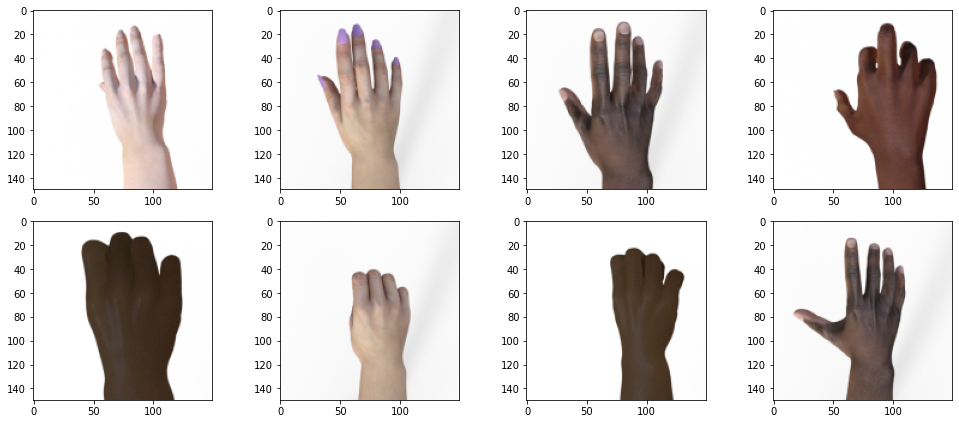

In [17]:
plot_random_sample(train_images_2, 8)

Перейдем к обучению нейронных сетей MLP и CNN.

Количество эпох 20

**Обучение нейронной сети MLP:**

In [18]:
model_MLP_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(150, 150, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_MLP_1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_MLP_1 = model_MLP_1.fit(
    train_images_2,
    train_labels_2,
    epochs=20,
    batch_size=128,
    validation_data=(test_images_2, test_labels_2)
)

Epoch 1/20
14/14 [==============================] - 5s 39ms/step - loss: 5.7421 - accuracy: 0.5054 - val_loss: 0.8537 - val_accuracy: 0.5242
Epoch 2/20
14/14 [==============================] - 0s 26ms/step - loss: 0.7074 - accuracy: 0.6357 - val_loss: 0.9853 - val_accuracy: 0.5202
Epoch 3/20
14/14 [==============================] - 0s 26ms/step - loss: 0.5492 - accuracy: 0.7190 - val_loss: 0.9984 - val_accuracy: 0.5242
Epoch 4/20
14/14 [==============================] - 0s 26ms/step - loss: 0.4049 - accuracy: 0.8440 - val_loss: 0.7954 - val_accuracy: 0.4556
Epoch 5/20
14/14 [==============================] - 0s 26ms/step - loss: 0.3592 - accuracy: 0.8601 - val_loss: 0.6738 - val_accuracy: 0.6935
Epoch 6/20
14/14 [==============================] - 0s 25ms/step - loss: 0.3736 - accuracy: 0.8423 - val_loss: 1.3079 - val_accuracy: 0.4798
Epoch 7/20
14/14 [==============================] - 0s 26ms/step - loss: 0.4382 - accuracy: 0.7946 - val_loss: 1.2645 - val_accuracy: 0.4435
Epoch 8/20
14

**Обучение нейронной сети CNN:**

In [19]:
model_CNN_1 = tf.keras.models.Sequential([
    # The first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The thrid convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    # only 1 output neuron. It will contain a value from 0-1 where,
    # 0 for class ('rock') and 1 for the other class('paper')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_CNN_1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_CNN_1 = model_CNN_1.fit(
    train_images_2,
    train_labels_2,
    epochs=20,
    batch_size=128,
    validation_data=(test_images_2, test_labels_2)
)

Epoch 1/20
14/14 [==============================] - 15s 248ms/step - loss: 0.6976 - accuracy: 0.5976 - val_loss: 0.6520 - val_accuracy: 0.5403
Epoch 2/20
14/14 [==============================] - 2s 134ms/step - loss: 0.2638 - accuracy: 0.8857 - val_loss: 0.2653 - val_accuracy: 0.8911
Epoch 3/20
14/14 [==============================] - 2s 135ms/step - loss: 0.0573 - accuracy: 0.9833 - val_loss: 0.2606 - val_accuracy: 0.9234
Epoch 4/20
14/14 [==============================] - 2s 135ms/step - loss: 0.0174 - accuracy: 0.9940 - val_loss: 0.3090 - val_accuracy: 0.9476
Epoch 5/20
14/14 [==============================] - 2s 135ms/step - loss: 0.0048 - accuracy: 0.9994 - val_loss: 0.2853 - val_accuracy: 0.9516
Epoch 6/20
14/14 [==============================] - 2s 135ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.3491 - val_accuracy: 0.8911
Epoch 7/20
14/14 [==============================] - 2s 135ms/step - loss: 6.9416e-04 - accuracy: 1.0000 - val_loss: 0.4289 - val_accuracy: 0.9194
E

#### Задание 4
Постройте кривые обучения нейронных сетей для показателей **ошибки** и **аккуратности** в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.  

**Для многослойного перцептрона**

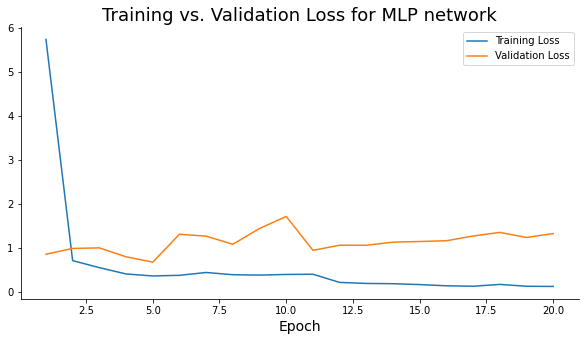

In [20]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (10, 5)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.plot(np.arange(1, 21), history_MLP_1.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 21), history_MLP_1.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss for MLP network', size=18)
plt.xlabel('Epoch', size=14)
plt.legend();

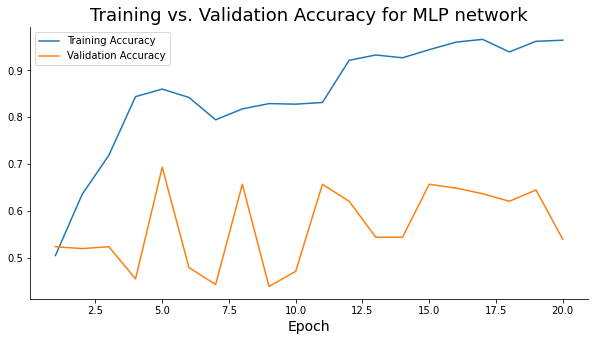

In [21]:
plt.plot(np.arange(1, 21), history_MLP_1.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(1, 21), history_MLP_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy for MLP network', size=18)
plt.xlabel('Epoch', size=14)
plt.legend();

**Для сверточной сети**

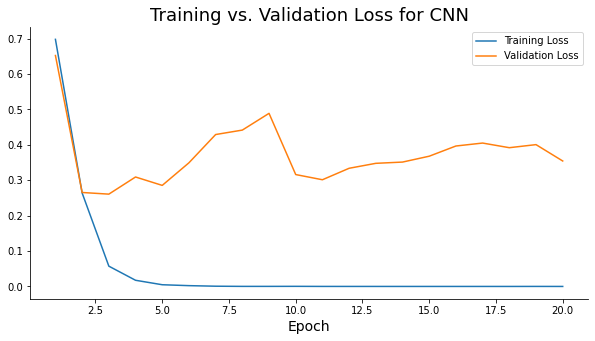

In [22]:
plt.plot(np.arange(1, 21), history_CNN_1.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 21), history_CNN_1.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss for CNN', size=18)
plt.xlabel('Epoch', size=14)
plt.legend();

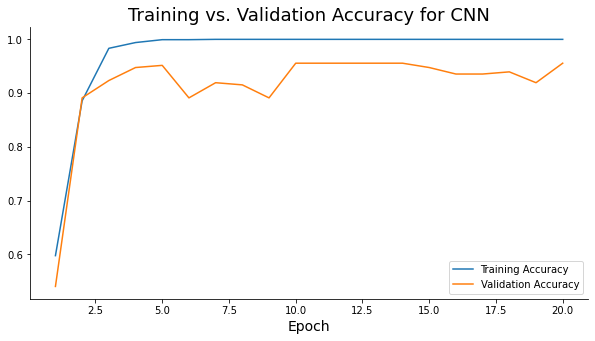

In [23]:
plt.plot(np.arange(1, 21), history_CNN_1.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(1, 21), history_CNN_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy for CNN', size=18)
plt.xlabel('Epoch', size=14)
plt.legend();

#### Задание 5
Сравните качество бинарной классификации нейронными сетями при помощи матрицы ошибок для тестовой выборки. 

In [76]:
prediction_MLP_1 = model_MLP_1.predict(test_images_2)
prediction_CNN_1 = model_CNN_1.predict(test_images_2)
prediction_CNN_1[:10]

array([[9.9999607e-01],
       [1.0830867e-03],
       [1.8100027e-06],
       [1.4536023e-04],
       [8.4159708e-01],
       [9.9999964e-01],
       [9.9060774e-01],
       [1.3441256e-08],
       [3.4348636e-07],
       [2.7845255e-03]], dtype=float32)

Получили значения похожие на вероятность. Преобразуем их в прогнозируемые классы.

In [25]:
pred_MLP_1 = np.array([1 if prob > 0.5 else 0 for prob in np.ravel(prediction_MLP_1)])
print(pred_MLP_1[:10])
pred_CNN_1 = np.array([1 if prob > 0.5 else 0 for prob in np.ravel(prediction_CNN_1)])
print(pred_CNN_1[:10])

[0 0 1 0 1 1 1 1 0 1]
[1 0 0 0 1 1 1 0 0 0]


$TP$ – (True Positives) – число корректно спрогнозированных точек в классе 1  
$FN$ – (False Negatives) – число точек в классе 1, ошибочно спрогнозированных в класс 0  
$FP$ – (False Positives) – число точек в классе 0, ошибочно спрогнозированных в класс 1  
$TN$ – (True Negatives) – число корректно спрогнозированных точек в классе 0 

In [54]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0.) & (y_predict == 0.))
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0.) & (y_predict == 1.))
def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1.) & (y_predict == 0.))
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1.) & (y_predict == 1.))

Функция вычисления значений матрицы:

In [27]:
def confusion_matrix(y_true, y_predict):
    return np.array([
        [TN(y_true, y_predict), FP(y_true, y_predict)],
        [FN(y_true, y_predict), TP(y_true, y_predict)]
    ])

In [28]:
confusion_matrix(test_labels_2, pred_MLP_1)

array([[57, 67],
       [47, 77]])

In [29]:
confusion_matrix(test_labels_2, pred_CNN_1)

array([[113,  11],
       [  0, 124]])

Вычислим показатель точности для класса 1:

In [30]:
def precision_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fp = FP(y_true, y_predict)
    try:
        return tp / (tp + fp)
    except:
        return 0.0

Показатель точности MLP:

In [31]:
precision_score(test_labels_2, pred_MLP_1)

0.5347222222222222

Показатель точности CNN:

In [32]:
precision_score(test_labels_2, pred_CNN_1)

0.9185185185185185

#### Задание 6
Визуализируйте ROC-кривые для построенных классификаторов на одном рисунке (с легендой) и вычислите площади под ROC-кривыми.

Построим ROC-кривую на тестовых данных.

In [34]:
def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

In [35]:
def roc_from_scratch(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 1):
        
        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])
        
    return roc.reshape(-1, 2)

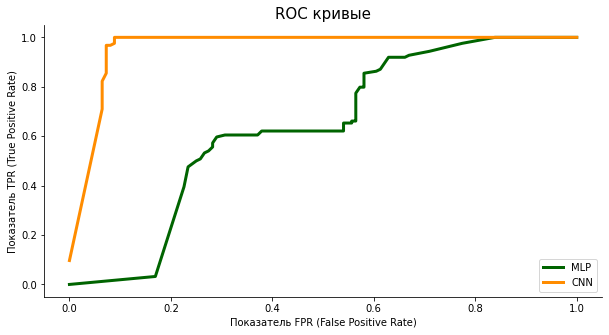

In [36]:
plt.figure(figsize=(10,5))

ROC1 = roc_from_scratch(prediction_MLP_1.reshape(-1), test_labels_2)
ROC2 = roc_from_scratch(prediction_CNN_1.reshape(-1), test_labels_2)
plt.plot(ROC1[:,0],ROC1[:,1],color="DarkGreen",lw=3, label="MLP")
plt.plot(ROC2[:,0],ROC2[:,1],color="DarkOrange",lw=3, label="CNN")
plt.legend(loc='lower right')
plt.title('ROC кривые',fontsize=15)
plt.xlabel('Показатель FPR (False Positive Rate)',fontsize=10)
plt.ylabel('Показатель TPR (True Positive Rate)',fontsize=10);

Подсчет площадей по ROC-кривыми.

In [37]:
def node(fx1, fx2, x1, x2):
  return np.abs((fx1+fx2)*(x2-x1)/2)

Площадь ROC-кривой сети MLP:

In [38]:
S = 0
for i in range(ROC1.shape[0]-1):
  S += node(ROC1[i][1], ROC1[i+1][1], ROC1[i][0], ROC1[i+1][0])
print("AUC = ", S)

AUC =  0.6343327263267434


Площадь ROC-кривой сети CNN:

In [39]:
S = 0
for i in range(ROC1.shape[0]-1):
  S += node(ROC2[i][1], ROC2[i+1][1], ROC2[i][0], ROC2[i+1][0])
print("AUC = ", S)

AUC =  0.9597099375650364


#### Задание 7
Оставьте в наборе изображения трех классов, указанных в индивидуальном задании. Обучите нейронные сети MLP и CNN задаче многоклассовой классификации изображений (архитектура сетей по вашему усмотрению). Количество эпох обучения указано в индивидуальном задании.  

Применим одно горячее кодирование:

In [48]:
def to_one_hot(labels, dimension=3):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, int(label)] = 1.
    return results

In [49]:
train_labels_3 = to_one_hot(train_labels)
test_labels_3 = to_one_hot(test_labels)
train_labels_3.shape, test_labels_3.shape

((2520, 3), (372, 3))

**MLP:**

In [52]:
model_MLP_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(150, 150, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_MLP_2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_MLP_2 = model_MLP_2.fit(
    train_images,
    train_labels_3,
    epochs=20,
    batch_size=128,
    validation_data=(test_images, test_labels_3)
)

Epoch 1/20
20/20 [==============================] - 1s 29ms/step - loss: 3.0994 - accuracy: 0.5843 - val_loss: 1.6044 - val_accuracy: 0.5645
Epoch 2/20
20/20 [==============================] - 0s 24ms/step - loss: 0.7340 - accuracy: 0.7257 - val_loss: 0.8073 - val_accuracy: 0.5663
Epoch 3/20
20/20 [==============================] - 0s 24ms/step - loss: 0.4307 - accuracy: 0.8044 - val_loss: 0.6857 - val_accuracy: 0.6048
Epoch 4/20
20/20 [==============================] - 0s 24ms/step - loss: 0.3585 - accuracy: 0.8462 - val_loss: 0.6410 - val_accuracy: 0.6559
Epoch 5/20
20/20 [==============================] - 0s 24ms/step - loss: 0.2911 - accuracy: 0.9003 - val_loss: 0.5523 - val_accuracy: 0.7133
Epoch 6/20
20/20 [==============================] - 0s 24ms/step - loss: 0.3276 - accuracy: 0.8672 - val_loss: 0.5940 - val_accuracy: 0.7742
Epoch 7/20
20/20 [==============================] - 0s 24ms/step - loss: 0.2469 - accuracy: 0.9164 - val_loss: 0.6279 - val_accuracy: 0.7016
Epoch 8/20
20

**CNN:**

In [53]:
model_CNN_2 = tf.keras.models.Sequential([
    # The first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The thrid convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

model_CNN_2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_CNN_2 = model_CNN_2.fit(
    train_images,
    train_labels_3,
    epochs=20,
    batch_size=128,
    validation_data=(test_images, test_labels_3)
)

Epoch 1/20
20/20 [==============================] - 6s 272ms/step - loss: 0.5813 - accuracy: 0.7099 - val_loss: 0.5256 - val_accuracy: 0.7168
Epoch 2/20
20/20 [==============================] - 3s 142ms/step - loss: 0.1857 - accuracy: 0.9250 - val_loss: 0.4186 - val_accuracy: 0.8522
Epoch 3/20
20/20 [==============================] - 3s 142ms/step - loss: 0.0352 - accuracy: 0.9880 - val_loss: 0.4859 - val_accuracy: 0.8790
Epoch 4/20
20/20 [==============================] - 3s 142ms/step - loss: 0.0086 - accuracy: 0.9974 - val_loss: 0.5757 - val_accuracy: 0.9032
Epoch 5/20
20/20 [==============================] - 3s 142ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.5942 - val_accuracy: 0.8907
Epoch 6/20
20/20 [==============================] - 3s 143ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.6264 - val_accuracy: 0.8907
Epoch 7/20
20/20 [==============================] - 3s 143ms/step - loss: 6.2210e-04 - accuracy: 1.0000 - val_loss: 0.6808 - val_accuracy: 0.8907
Ep

#### Задание 8
Сравните качество многоклассовой классификации нейронными сетями при помощи матрицы ошибок (для трех классов) для тестовой выборки.

Для начала преобразуем предсказания моделей из вероятности в определенные классы.

In [79]:
prediction_MLP_2 = model_MLP_2.predict(test_images)
prediction_CNN_2 = model_CNN_2.predict(test_images)
prediction_CNN_2[:10]

array([[1.0448851e-08, 4.7870930e-03, 9.9798191e-01],
       [2.0477522e-09, 1.0000000e+00, 1.8825472e-11],
       [9.2089875e-03, 1.7470150e-12, 8.6710870e-01],
       [9.9999964e-01, 3.5083725e-05, 2.1004994e-13],
       [9.9999988e-01, 2.5037367e-10, 9.4007632e-08],
       [1.0000000e+00, 8.1545281e-08, 4.2710124e-15],
       [2.4870726e-05, 9.9799013e-01, 3.8090173e-05],
       [5.4307218e-11, 9.9969947e-01, 1.6343256e-03],
       [8.2027614e-12, 7.1508071e-09, 1.0000000e+00],
       [1.8091803e-05, 9.9446833e-01, 5.5110099e-04]], dtype=float32)

Присваеваем параметру с максимальным значением значение 1, остальным 0.

In [83]:
for i in range(len(prediction_MLP_2)):
  j = prediction_MLP_2[i].argmax()
  prediction_MLP_2[i] = [0, 0, 0]
  prediction_MLP_2[i][j] = 1

for i in range(len(prediction_CNN_2)):
  j = prediction_CNN_2[i].argmax()
  prediction_CNN_2[i] = [0, 0, 0]
  prediction_CNN_2[i][j] = 1

Итоговые предсказания:

In [65]:
print(prediction_MLP_2[:10])
print(prediction_CNN_2[:10])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [92]:
test_labels_3[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

Воспользуемся библиотекой Scikit-Learn для подсчета матриц ошибок:

Для **MLP:**

In [100]:
from sklearn.metrics import multilabel_confusion_matrix
conf_m = multilabel_confusion_matrix(test_labels_3, prediction_MLP_2)
conf_m 

array([[[159,  89],
        [ 43,  81]],

       [[229,  19],
        [109,  15]],

       [[178,  70],
        [ 26,  98]]])

Вывод функции:  
MCM(0, 0) - TN  
MCM(0, 1) - FP  
MCM(1, 0) - FN  
MCM(1, 1) - TP  
- Первая матрица - положительный класс 0
- Вторая матрица - положительный класс 1
- Третья матрица - положительный класс 2

Точность для положительного класса:

Класс 0:

In [104]:
conf_m[0, 1, 1]/(conf_m[0, 1, 1] + conf_m[0, 0, 1])

0.4764705882352941

Класс 1:

In [105]:
conf_m[1, 1, 1]/(conf_m[1, 1, 1] + conf_m[1, 0, 1])

0.4411764705882353

Класс 2:

In [106]:
conf_m[2, 1, 1]/(conf_m[2, 1, 1] + conf_m[2, 0, 1])

0.5833333333333334

Для **CNN:**

In [107]:
conf_m_2 = multilabel_confusion_matrix(test_labels_3, prediction_CNN_2)
conf_m_2

array([[[241,   7],
        [ 24, 100]],

       [[218,  30],
        [  5, 119]],

       [[233,  15],
        [ 23, 101]]])

Точность:

Класс 0:

In [108]:
conf_m_2[0, 1, 1]/(conf_m_2[0, 1, 1] + conf_m_2[0, 0, 1])

0.9345794392523364

Класс 1:

In [109]:
conf_m_2[1, 1, 1]/(conf_m_2[1, 1, 1] + conf_m_2[1, 0, 1])

0.7986577181208053

Класс 2:

In [110]:
conf_m_2[2, 1, 1]/(conf_m_2[2, 1, 1] + conf_m_2[2, 0, 1])

0.8706896551724138

#### Задание 9
Постройте кривые обучения нейронных сетей для показателей ошибки и аккуратности в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.



MLP:

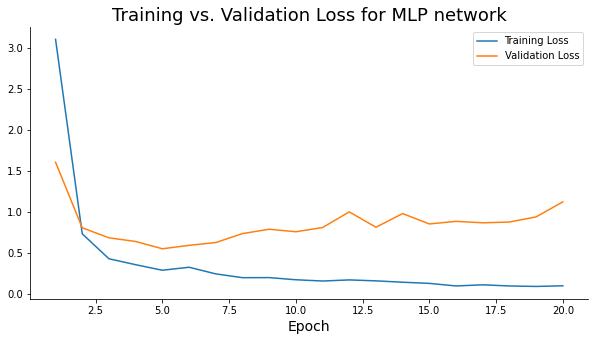

In [111]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (10, 5)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.plot(np.arange(1, 21), history_MLP_2.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 21), history_MLP_2.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss for MLP network', size=18)
plt.xlabel('Epoch', size=14)
plt.legend();

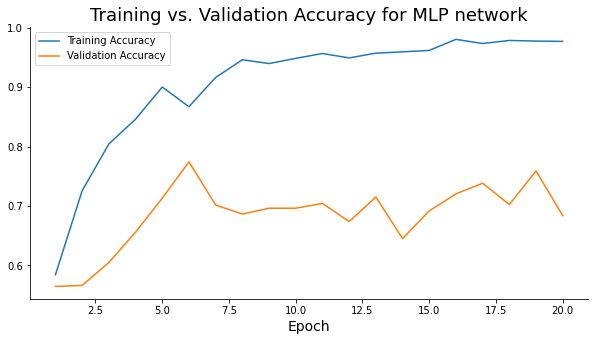

In [112]:
plt.plot(np.arange(1, 21), history_MLP_2.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(1, 21), history_MLP_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy for MLP network', size=18)
plt.xlabel('Epoch', size=14)
plt.legend();

CNN:

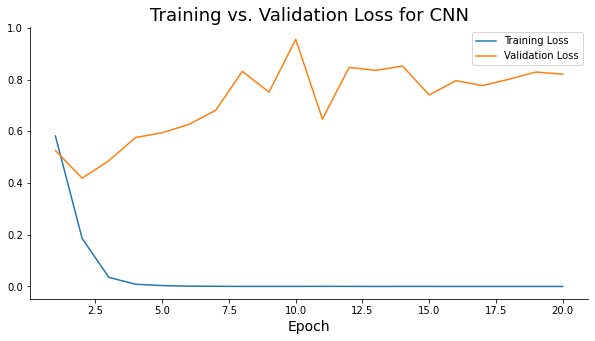

In [113]:
plt.plot(np.arange(1, 21), history_CNN_2.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 21), history_CNN_2.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss for CNN', size=18)
plt.xlabel('Epoch', size=14)
plt.legend();

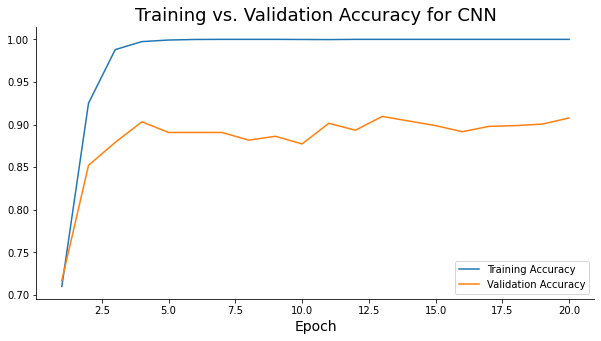

In [114]:
plt.plot(np.arange(1, 21), history_CNN_2.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(1, 21), history_CNN_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy for CNN', size=18)
plt.xlabel('Epoch', size=14)
plt.legend();